<a href="https://colab.research.google.com/github/Aisha1820/The-Sparks-Foundation_INTERN/blob/main/Prediction_DT(Task6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**

**DATA SCIENCE- BUSINESS ANALYTICS INTERN**

Task #6 : **Prediction Using Decision Tree Algorithm**

(Level-Intermediate)

Dataset:https://bit.ly/3kXTdox

AUTHOR : Ayesha Shahanaz.

In [ ]:
# Importing libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

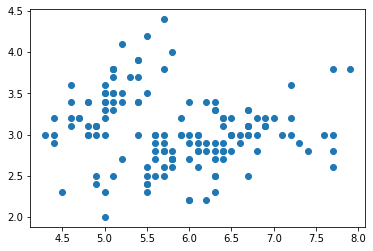

In [ ]:
#Visualizing the dataset
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

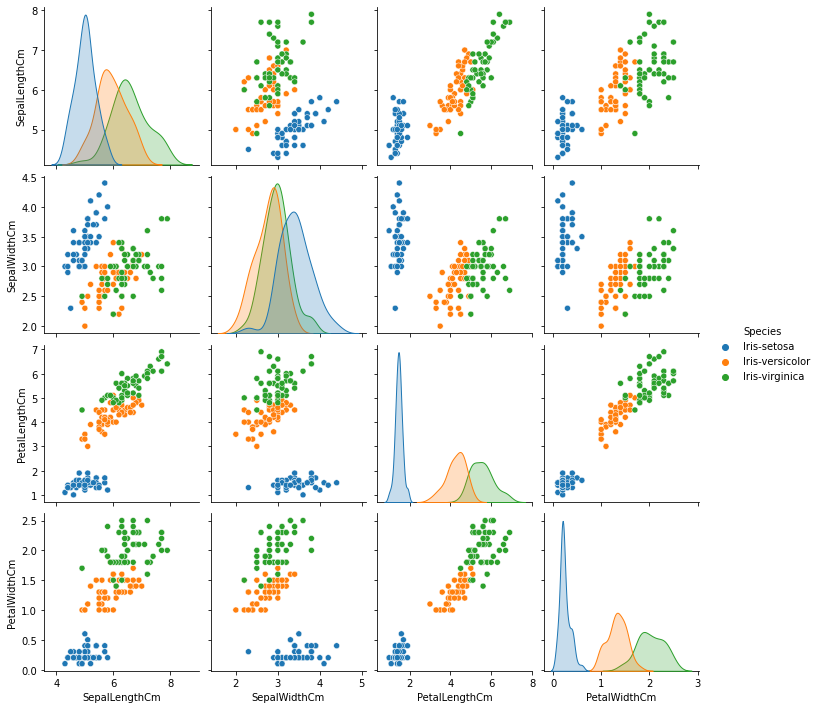

In [ ]:
#pair plot
import seaborn as sns
sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

In [ ]:
df['Sepal_diff']=df['SepalLengthCm']-df['SepalWidthCm']
df['Petal_diff']=df['PetalLengthCm']-df['PetalWidthCm']
df['Sepal_Petal_len_diff']=df['SepalLengthCm']-df['PetalLengthCm']
df['Sepal_Petal_width_diff']=df['SepalWidthCm']-df['PetalWidthCm']
df['Sepal_Petal_len_wid_diff']=df['SepalLengthCm']-df['PetalWidthCm']
df['Sepal_Petal_wid_len_diff']=df['SepalWidthCm']-df['PetalLengthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_width_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


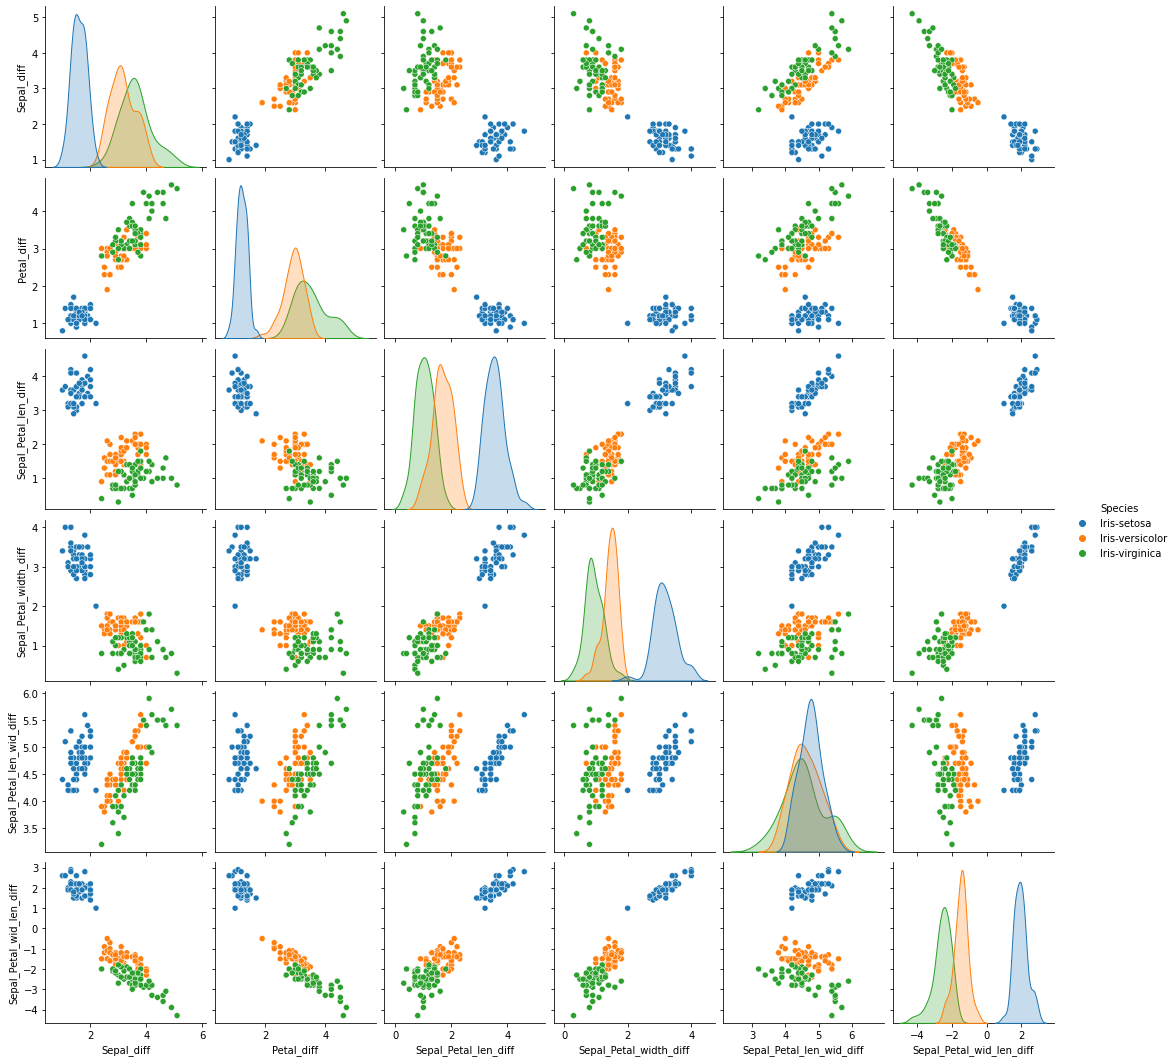

In [ ]:
#relationship
sns.pairplot(df[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_Petal_len_diff', 'Sepal_Petal_width_diff', 'Sepal_Petal_len_wid_diff', 'Sepal_Petal_wid_len_diff']], hue='Species')
plt.show()

In [ ]:
#dropping
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [ ]:
#Decision tree model
df_first = DecisionTreeClassifier()
df_first.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
Y_prediction=df_first.predict(X_test)

In [ ]:
confusion_matrix(y_test,Y_prediction)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
#Classification report
print(classification_report(y_test, Y_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
#Visualization
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

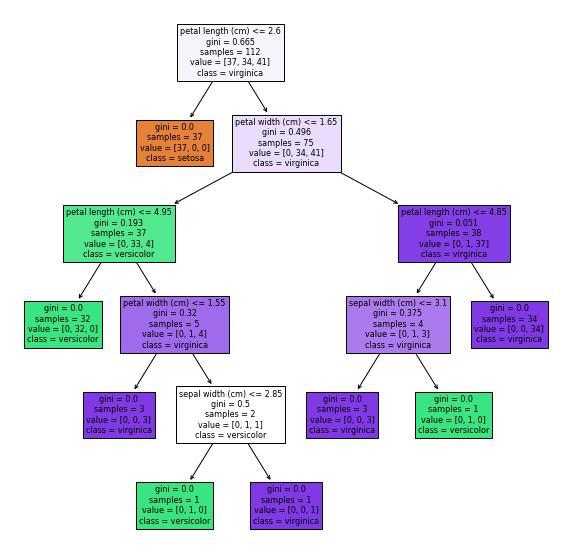

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(df_first, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=1,random_state=1234)
dt2 = DecisionTreeClassifier(max_depth=2,random_state=1234)
dt3 = DecisionTreeClassifier(max_depth=3,random_state=1234)
dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

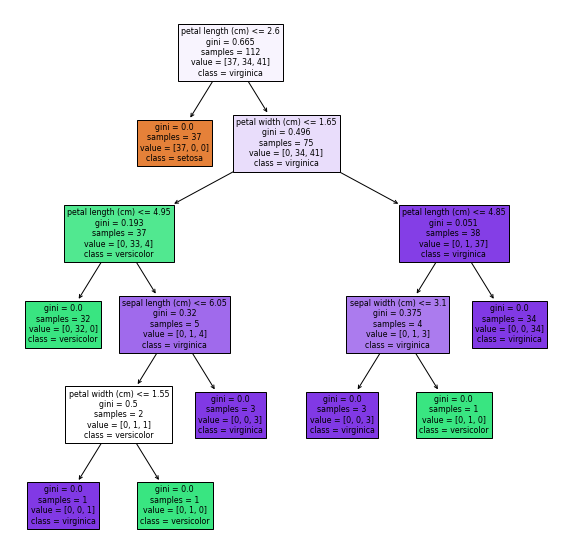

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

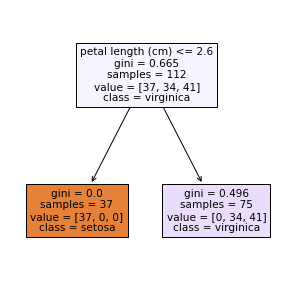

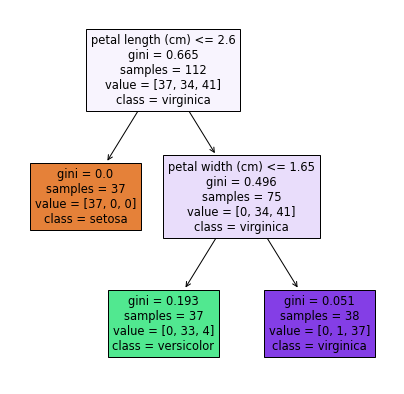

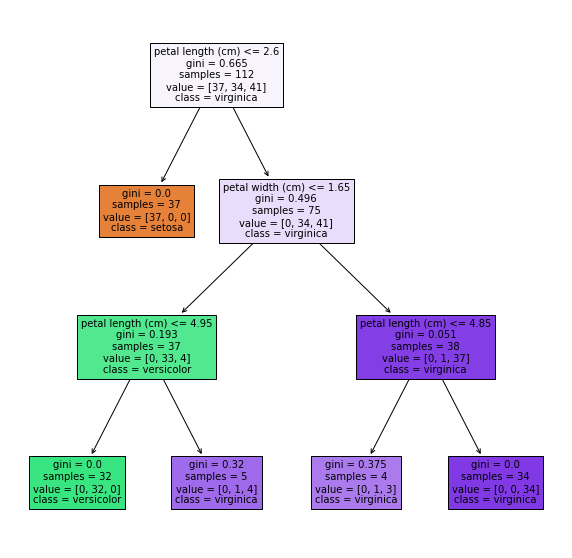

In [ ]:
fig1 = plt.figure(figsize=(5,5))
_ = tree.plot_tree(dt1, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

fig2 = plt.figure(figsize=(7,7))
_ = tree.plot_tree(dt2, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

fig3 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt3, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    df = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    df.fit(X_train, y_train)
    y_pred = df.predict(X_test)
    score = df.score(X_test, y_test)
    accuracy.append(score)
    print(accuracy)

[0.5789473684210527]
[0.5789473684210527, 0.9736842105263158]
[0.5789473684210527, 0.9736842105263158, 0.9736842105263158]
[0.5789473684210527, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]
[0.5789473684210527, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


In [ ]:
test_point=[[5.4,3.0,4.5,1.5]]
print(df_first.predict(test_point))

['Iris-versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
